In [1]:
from matplotlib import pyplot as plt
import numpy as np

from astropy.coordinates import solar_system_ephemeris
from astropy.time import Time, TimeDelta
from astropy import units as u

from poliastro.bodies import Earth, Moon
from poliastro.constants import rho0_earth, H0_earth

from poliastro.core.elements import rv2coe
from poliastro.core.perturbations import (
    atmospheric_drag_exponential,
    third_body,
    J2_perturbation,
)
from poliastro.core.propagation import func_twobody
from poliastro.ephem import build_ephem_interpolant
from poliastro.plotting import OrbitPlotter3D
from poliastro.twobody import Orbit
from poliastro.twobody.propagation import CowellPropagator
from poliastro.twobody.sampling import EpochsArray
from poliastro.util import norm

In [3]:
# More info: https://plotly.com/python/renderers/
import plotly.io as pio

pio.renderers.default = "plotly_mimetype+notebook_connected"

In [4]:
R = Earth.R.to(u.km).value
k = Earth.k.to(u.km**3 / u.s**2).value

orbit = Orbit.circular(
    Earth, 250 * u.km, epoch=Time(0.0, format="jd", scale="tdb")
)

# parameters of a body
C_D = 2.2  # dimentionless (any value would do)
A_over_m = ((np.pi / 4.0) * (u.m**2) / (100 * u.kg)).to_value(
    u.km**2 / u.kg
)  # km^2/kg
B = C_D * A_over_m

# parameters of the atmosphere
rho0 = rho0_earth.to(u.kg / u.km**3).value  # kg/km^3
H0 = H0_earth.to(u.km).value

In [9]:
tofs = TimeDelta(np.linspace(0 * u.h, 500000 * u.s, num=1000))


def f(t0, state, k):
    du_kep = func_twobody(t0, state, k)
    ax, ay, az = atmospheric_drag_exponential(
        t0,
        state,
        k,
        R=R,
        C_D=C_D,
        A_over_m=A_over_m,
        H0=H0,
        rho0=rho0,
    )
    du_ad = np.array([0, 0, 0, ax, ay, az])

    return du_kep + du_ad


rr, _ = orbit.to_ephem(
    EpochsArray(orbit.epoch + tofs, method=CowellPropagator(f=f)),
).rv()

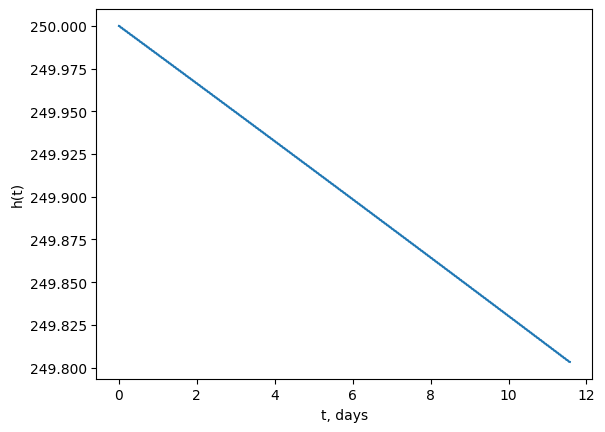

In [10]:
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, norm(rr, axis=1) - Earth.R)

In [11]:
tofs = TimeDelta(np.linspace(0 * u.h, 10000000 * u.s, num=1000))


def f(t0, state, k):
    du_kep = func_twobody(t0, state, k)
    ax, ay, az = atmospheric_drag_exponential(
        t0,
        state,
        k,
        R=R,
        C_D=C_D,
        A_over_m=A_over_m,
        H0=H0,
        rho0=rho0,
    )
    du_ad = np.array([0, 0, 0, ax, ay, az])

    return du_kep + du_ad


rr, _ = orbit.to_ephem(
    EpochsArray(orbit.epoch + tofs, method=CowellPropagator(f=f)),
).rv()

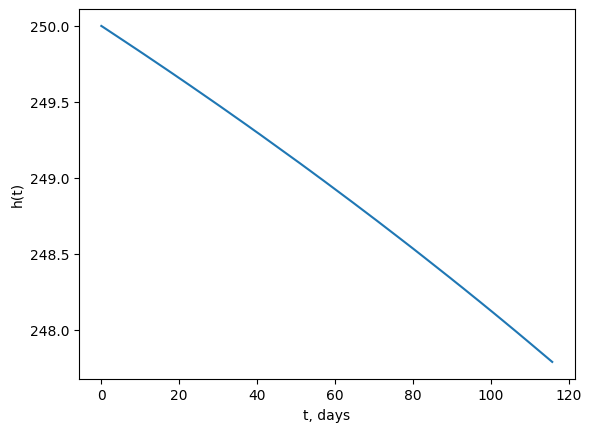

In [12]:
plt.ylabel("h(t)")
plt.xlabel("t, days")
plt.plot(tofs.value, norm(rr, axis=1) - Earth.R)
